## 206-shinahaudrey-midterm-part1

**•Research Question: What insights might be derived from studying Seoul’s transportation network that could inform the transit-oriented development of Los Angeles?**   

• While comparing the whole LA County and Seoul Metropolitan Area allow us to examine the cities in more general perspectives, due to limited storage of jupyternotebook, we concluded that it is hard to manage the dataset. Thus, we decided to narrow down our scope to neighborhoods and compare the neighborhoods of each city in terms of transit system.   

• Our project explore 10 neighborhoods in each of the cities. We identify 10 neighborhoods based on population density, job density, commute mode, railway ridership. Steps 1,3 and 5 in the flowchart below are the process for identifying the neighborhoods. After identifying the neighborhoods, we conduct analysis by using OSMnx library which enables us to switch our data to network and explore urban form. This process is shown in Step 2,4, and 6 in the flowchart below.     

•_Flowchart_
![flowchart](flowchart_midterm.jpg)   

• Datasource   
The source of each data will be explained during the analysis.

**•This notebook'206-shinahaudrey-midterm-part1', written by Shinah Park, is about identifying densely populated areas in LA County and Seoul, which is Step 1 in the flowchart. In addition, for Seoul, identifying job densed areas is also included in this notebook. Job dense areas of LA will be identified after the midterm. The analysis level for LA is census tract and 'administration dong' for Seoul.**

### Exploring Population Dense Areas in Los Angeles County

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

This population dataset is downloaded from [Censusreporter](https://censusreporter.org/). The metadata can be found [here](https://jupyter.idre.ucla.edu/user/shinah@ucla.edu/edit/21W-UP206A/Weeks/Week03/data/metadata.json). (The link directs to my jupyternotebook data file. You can see it if you have access to my server.)

In [2]:
LA_pop = gpd.read_file('data/acs2019_5yr_B03002_14000US06037534001.geojson')

In [3]:
LA_pop.shape

(2347, 45)

In [4]:
LA_pop.head()

geoid                                   name   B03002001  \
0        05000US06037                 Los Angeles County, CA  10081570.0   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA      4283.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA      3405.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA      6347.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA      3702.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0               0.0  5193136.0               0.0  2641770.0            1343.0   
1             443.0     3095.0             354.0     2616.0             306.0   
2             334.0     3258.0             344.0     2882.0             358.0   
3             484.0     3731.0             465.0     2986.0             435.0   
4             276.0     2338.0             236.0     1812.0             271.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
0   790252.0            2958.0  ...             567.0  2083135.0   
1       19.0              15.0  ...              12.0      383.0   
2       74.0             102.0  ...              12.0       48.0   
3      198.0             165.0  ...              17.0      874.0   
4       87.0             107.0  ...              12.0      497.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
0           21995.0   174263.0            4915.0   103325.0            3658.0   
1             311.0       74.0              52.0       34.0              28.0   
2              55.0        0.0              12.0        0.0              12.0   
3             477.0       81.0              80.0       48.0              62.0   
4             231.0       45.0              42.0       11.0              18.0   

   B03002021  B03002021, Error  \
0    70938.0            2605.0   
1       40.0              46.0   
2        0.0              12.0   
3       33.0              51.0   
4       34.0              39.0   

                                            geometry  
0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  

[5 rows x 45 columns]

Dropping the first raw because it skews the whole dataset.

In [5]:
LA_pop = LA_pop.drop([0])

In [6]:
LA_pop.head()

geoid                                   name  B03002001  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     4283.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     3405.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     6347.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     3702.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA     3884.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
1             443.0     3095.0             354.0     2616.0             306.0   
2             334.0     3258.0             344.0     2882.0             358.0   
3             484.0     3731.0             465.0     2986.0             435.0   
4             276.0     2338.0             236.0     1812.0             271.0   
5             394.0     3587.0             363.0     3126.0             359.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
1       19.0              15.0  ...              12.0      383.0   
2       74.0             102.0  ...              12.0       48.0   
3      198.0             165.0  ...              17.0      874.0   
4       87.0             107.0  ...              12.0      497.0   
5      205.0             232.0  ...              12.0       45.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
1             311.0       74.0              52.0       34.0              28.0   
2              55.0        0.0              12.0        0.0              12.0   
3             477.0       81.0              80.0       48.0              62.0   
4             231.0       45.0              42.0       11.0              18.0   
5              38.0       28.0              32.0       28.0              32.0   

   B03002021  B03002021, Error  \
1       40.0              46.0   
2        0.0              12.0   
3       33.0              51.0   
4       34.0              39.0   
5        0.0              12.0   

                                            geometry  
1  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
5  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...  

[5 rows x 45 columns]

In [7]:
list(LA_pop)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
LA_pop.columns

Index(['geoid', 'name', 'B03002001', 'B03002001, Error', 'B03002002',
       'B03002002, Error', 'B03002003', 'B03002003, Error', 'B03002004',
       'B03002004, Error', 'B03002005', 'B03002005, Error', 'B03002006',
       'B03002006, Error', 'B03002007', 'B03002007, Error', 'B03002008',
       'B03002008, Error', 'B03002009', 'B03002009, Error', 'B03002010',
       'B03002010, Error', 'B03002011', 'B03002011, Error', 'B03002012',
       'B03002012, Error', 'B03002013', 'B03002013, Error', 'B03002014',
       'B03002014, Error', 'B03002015', 'B03002015, Error', 'B03002016',
       'B03002016, Error', 'B03002017', 'B03002017, Error', 'B03002018',
       'B03002018, Error', 'B03002019', 'B03002019, Error', 'B03002020',
       'B03002020, Error', 'B03002021', 'B03002021, Error', 'geometry'],
      dtype='object')

I only need the first column which indicates total number of people in each census tracts.

In [10]:
LA_pop_columnstokeep = ['geoid', 'name', 'B03002001', 'geometry']

In [11]:
LA_pop = LA_pop[LA_pop_columnstokeep]

In [12]:
LA_pop.columns = ['geoid', 'name', 'population', 'geometry']

In [13]:
LA_pop.sample()

geoid                                   name  population  \
161  14000US06037121802  Census Tract 1218.02, Los Angeles, CA      3216.0   

                                              geometry  
161  MULTIPOLYGON (((-118.39652 34.21935, -118.3965...

In [14]:
LA_pop['population'].describe()

count     2346.000000
mean      4297.344416
std       1587.065962
min          0.000000
25%       3203.750000
50%       4211.500000
75%       5314.000000
max      12463.000000
Name: population, dtype: float64

Plotting the raw population is less meaningful. To make it more useful, I will devide them by area.    
Checking coordinates before creating and calculating 'area' column just in case.

In [15]:
LA_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
LA_pop = LA_pop.to_crs(epsg=3857)

In [17]:
LA_pop['area'] = LA_pop['geometry'].area  

In [18]:
LA_pop['pop_density'] = LA_pop['population']/LA_pop['area']

Created a new column 'pop_density'.

In [19]:
LA_pop.head()

geoid                                   name  population  \
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA      4283.0   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA      3405.0   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA      6347.0   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA      3702.0   
5  14000US06037101300     Census Tract 1013, Los Angeles, CA      3884.0   

                                            geometry          area  \
1  MULTIPOLYGON (((-13169350.794 4063591.834, -13...  1.676518e+06   
2  MULTIPOLYGON (((-13169467.902 4065613.937, -13...  3.880999e+06   
3  MULTIPOLYGON (((-13169034.646 4063225.625, -13...  9.547673e+05   
4  MULTIPOLYGON (((-13167528.939 4062726.771, -13...  1.025452e+06   
5  MULTIPOLYGON (((-13166671.668 4062511.964, -13...  3.787079e+06   

   pop_density  
1     0.002555  
2     0.000877  
3     0.006648  
4     0.003610  
5     0.001026

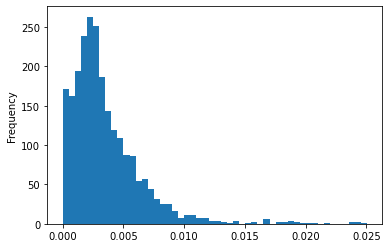

In [20]:
LA_pop['pop_density'].plot.hist(bins=50)

Looking at the chart above, we can learn that there are only few of the areas that have reletively high density and most are under 0.01, similar to eachothers. 

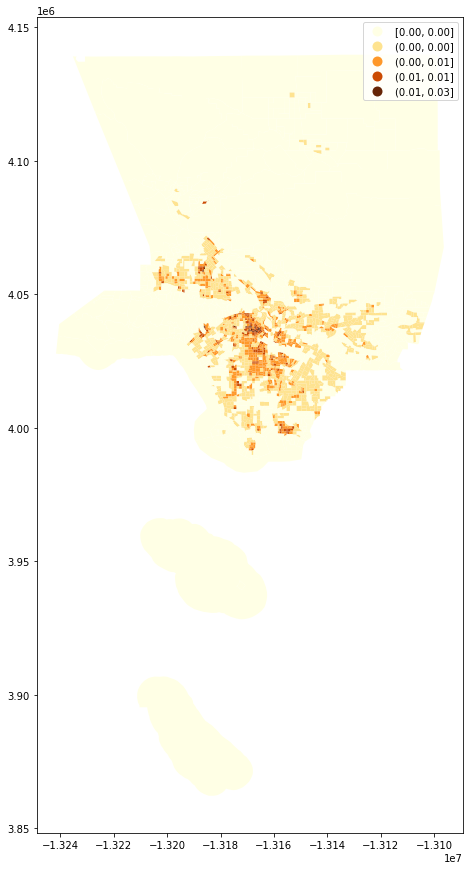

In [21]:
ax = LA_pop.plot(figsize=(15,15),
                 cmap='YlOrBr',
                 column='pop_density',
                 legend=True,  
                 scheme='NaturalBreaks')

This is a map showing the population density of LA County.

In [22]:
LA_pop_sorted = LA_pop.sort_values(by='pop_density',ascending = False)

In [23]:
LA_pop_sorted[['geoid','pop_density']].head(5)

geoid  pop_density
566  14000US06037209104     0.025053
563  14000US06037208904     0.024293
596  14000US06037211922     0.024088
849  14000US06037265303     0.023846
134  14000US06037119340     0.023801

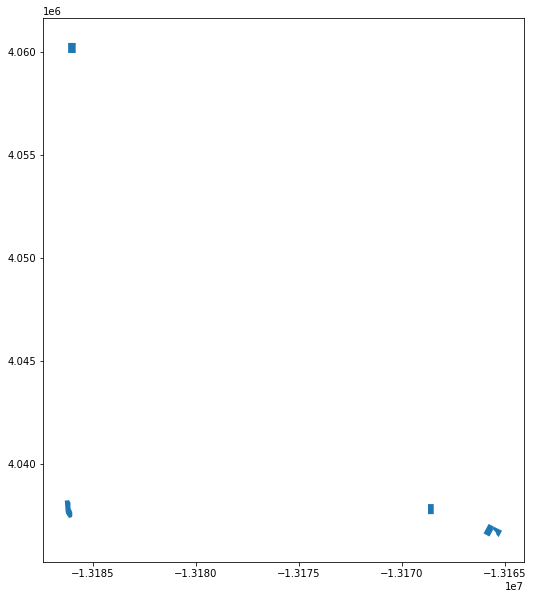

In [24]:
LA_pop[LA_pop['pop_density'] >= 0.023801].plot(figsize=(12,10)) #0.023801 is the 5th census tract's pop_density value

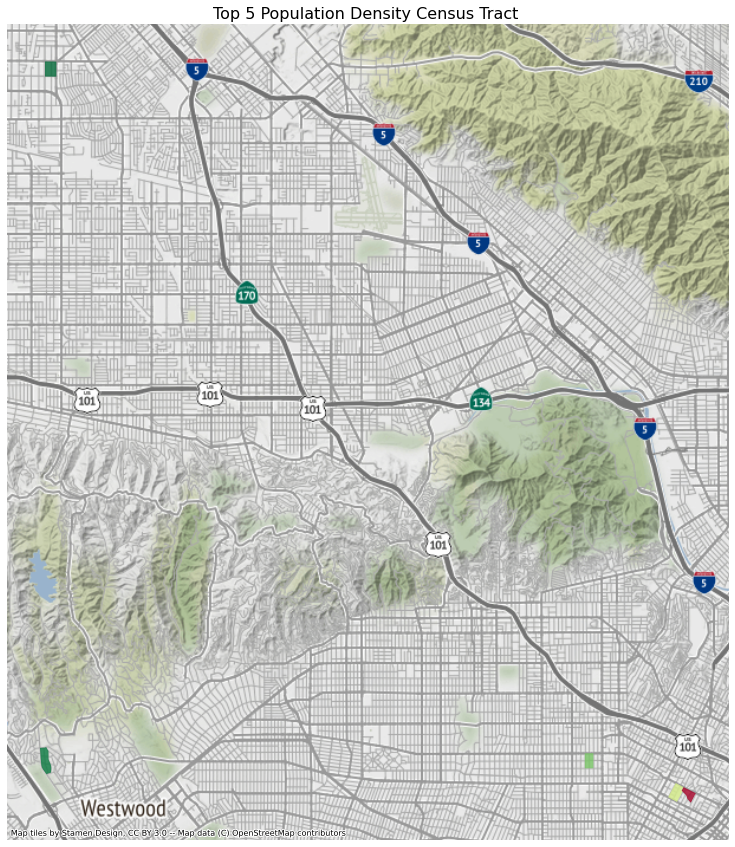

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
LA_pop[LA_pop['pop_density'] >= 0.023801].plot(ax=ax, alpha=0.8, column='pop_density', cmap = 'RdYlGn_r')

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Top 5 Population Density Census Tract ',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

Looks like MacArthur Park, Koreatown, Panorama City, and Westwood have Census Tracts with the highest population densities. We can conclude that the highest populated region is MacArthur Park/Westlake. We are going to conduct OSMnx analysis on Westlake region in the '206-shinahaudrey-midterm-part2' notebook.

### Exploring Population Dense and Job Dense Areas in Seoul

seoul_data_com is a csv I created by organizating data downloaded from [KOSTAT](http://kostat.go.kr/portal/eng/index.action) and [서울 열린 데이터 광장](https://data.seoul.go.kr/) (This is 'Seoul open data avenue' when word-for-word translated). KOSTAT is an government institution that provides national statistics. I used population data, number of workers data from KOSTAT and  commute mode data from 서울 열린 데이터 광장. Commute mode data will be used in '206-shinahaudrey-midterm-part3' notebook.

In [26]:
Seoul_data = gpd.read_file('data/seoul_data_com.csv')

Checking basic infos here..

In [27]:
Seoul_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Gu                     425 non-null    object  
 1   Dong                   425 non-null    object  
 2   Population             425 non-null    object  
 3   Number of businesses   425 non-null    object  
 4   Number of workers      425 non-null    object  
 5   Walked                 425 non-null    object  
 6   Bicycle                425 non-null    object  
 7   Taxicab_motorcycle     425 non-null    object  
 8   Public_transportation  425 non-null    object  
 9   Bus                    425 non-null    object  
 10  Subway                 425 non-null    object  
 11  Bus_and_subway         425 non-null    object  
 12  Car                    425 non-null    object  
 13  geometry               0 non-null      geometry
dtypes: geometry(1), object(13)
memory 

Check how the dataframe looks like

In [28]:
Seoul_data.head()

Gu Dong Population Number of businesses Number of workers Walked Bicycle  \
0  종로구  사직동       4765                 3541             49536   23.9     3.1   
1  종로구  삼청동       1369                  712              4577   23.9     3.1   
2  종로구  부암동       4348                  565              3609   23.9     3.1   
3  종로구  평창동       7518                  751              3565   23.9     3.1   
4  종로구  무악동       3203                  581              1598   23.9     3.1   

  Taxicab_motorcycle Public_transportation   Bus Subway Bus_and_subway   Car  \
0                0.6                    57  36.4    6.1           14.5  15.3   
1                0.6                    57  36.4    6.1           14.5  15.3   
2                0.6                    57  36.4    6.1           14.5  15.3   
3                0.6                    57  36.4    6.1           14.5  15.3   
4                0.6                    57  36.4    6.1           14.5  15.3   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None

In [29]:
Seoul_data.tail()

Gu  Dong Population Number of businesses Number of workers Walked  \
420  강동구  둔촌1동        160                   19               341   17.3   
421  강동구  둔촌2동      11188                 1601              9718   17.3   
422  강동구  암사1동      16209                 1916              5756   17.3   
423  강동구  천호2동      17899                 3736             14933   17.3   
424  강동구    길동      21471                 5172             19657   17.3   

    Bicycle Taxicab_motorcycle Public_transportation   Bus Subway  \
420     1.3                0.6                  53.7  24.2    9.8   
421     1.3                0.6                  53.7  24.2    9.8   
422     1.3                0.6                  53.7  24.2    9.8   
423     1.3                0.6                  53.7  24.2    9.8   
424     1.3                0.6                  53.7  24.2    9.8   

    Bus_and_subway   Car geometry  
420           19.7  27.2     None  
421           19.7  27.2     None  
422           19.7  27.2     None  
423           19.7  27.2     None  
424           19.7  27.2     None

My goal is to use 'Population' and 'Number of workers' column

In [30]:
adm_dong_seoul = gpd.read_file('data/adm_dong_seoul.shp')

Checking to see projected crs here

In [31]:
adm_dong_seoul.crs

<Projected CRS: EPSG:5181>
Name: Korea 2000 / Central Belt
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Korea, Republic of (South Korea) - 126°E to 128°E mainland
- bounds: (126.0, 33.96, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

This shape file DOES have a crs associated to it. (epsg:5181)

In [32]:
adm_dong_seoul.head()

BASE_DATE ADM_DR_CD ADM_DR_NM OBJECTID  \
0  20200630   1101053       사직동        1   
1  20200630   1101054       삼청동        2   
2  20200630   1101055       부암동        3   
3  20200630   1101056       평창동        4   
4  20200630   1101057       무악동        5   

                                            geometry  
0  POLYGON ((197702.069 453187.312, 197703.481 45...  
1  POLYGON ((197980.839 455346.068, 197995.471 45...  
2  POLYGON ((196621.073 456395.880, 196628.373 45...  
3  POLYGON ((197800.769 459064.245, 197782.531 45...  
4  POLYGON ((196444.745 453384.564, 196471.668 45...

Good! It has geometry in it, and a column that has same contents as csv.

I need a list of Seoul_data columns. This will we used in the process to ignore 'geometry' column to avoid confusion with 'geometry' in the shape file.

In [33]:
list(Seoul_data)

['Gu',
 'Dong',
 'Population',
 'Number of businesses',
 'Number of workers',
 'Walked',
 'Bicycle',
 'Taxicab_motorcycle',
 'Public_transportation',
 'Bus',
 'Subway',
 'Bus_and_subway',
 'Car',
 'geometry']

In [34]:
Seoul_data_columns_to_keep = ['Gu',
 'Dong',
 'Population',
 'Number of businesses',
 'Number of workers']

Refining Seoul_data to have the columns that I only need.

In [35]:
Seoul_data = Seoul_data[Seoul_data_columns_to_keep]

In [36]:
Seoul_data.head(10)

Gu         Dong Population Number of businesses Number of workers
0  종로구          사직동       4765                 3541             49536
1  종로구          삼청동       1369                  712              4577
2  종로구          부암동       4348                  565              3609
3  종로구          평창동       7518                  751              3565
4  종로구          무악동       3203                  581              1598
5  종로구          교남동       4594                  393              4008
6  종로구          가회동       2070                  766             14100
7  종로구  종로1.2.3.4가동       5234                15603            109824
8  종로구      종로5·6가동       3459                 7461             24713
9  종로구          이화동       4433                 1245             16751

Now, let's look at adm_dong_seoul shapefile to organize it to make it easier to merge.

In [37]:
list(adm_dong_seoul)

['BASE_DATE', 'ADM_DR_CD', 'ADM_DR_NM', 'OBJECTID', 'geometry']

In [38]:
adm_dong_seoul.head(10)

BASE_DATE ADM_DR_CD    ADM_DR_NM OBJECTID  \
0  20200630   1101053          사직동        1   
1  20200630   1101054          삼청동        2   
2  20200630   1101055          부암동        3   
3  20200630   1101056          평창동        4   
4  20200630   1101057          무악동        5   
5  20200630   1101058          교남동        6   
6  20200630   1101060          가회동        7   
7  20200630   1101061  종로1·2·3·4가동        8   
8  20200630   1101063      종로5·6가동        9   
9  20200630   1101064          이화동       10   

                                            geometry  
0  POLYGON ((197702.069 453187.312, 197703.481 45...  
1  POLYGON ((197980.839 455346.068, 197995.471 45...  
2  POLYGON ((196621.073 456395.880, 196628.373 45...  
3  POLYGON ((197800.769 459064.245, 197782.531 45...  
4  POLYGON ((196444.745 453384.564, 196471.668 45...  
5  POLYGON ((196720.291 453105.144, 196721.332 45...  
6  POLYGON ((199036.605 454473.750, 199030.268 45...  
7  POLYGON ((199061.502 454230.746, 199069.577 45...  
8  POLYGON ((200757.039 453017.729, 200756.917 45...  
9  POLYGON ((200510.908 453979.009, 200516.753 45...

I want to rename 'adm_dr_nm' of Seoul_shape to 'Dong' because this is the key for merging two files.

In [39]:
adm_dong_seoul.column = ['BASE_DATE', 'ADM_DR_CD', 'Dong', 'OBJECTID', 'geometry']

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:167: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


**Because of the error above, I decided to rather create a new column than renaming.**

In [40]:
adm_dong_seoul['Dong'] = adm_dong_seoul['ADM_DR_NM']

In [41]:
adm_dong_seoul.head(10)

BASE_DATE ADM_DR_CD    ADM_DR_NM OBJECTID  \
0  20200630   1101053          사직동        1   
1  20200630   1101054          삼청동        2   
2  20200630   1101055          부암동        3   
3  20200630   1101056          평창동        4   
4  20200630   1101057          무악동        5   
5  20200630   1101058          교남동        6   
6  20200630   1101060          가회동        7   
7  20200630   1101061  종로1·2·3·4가동        8   
8  20200630   1101063      종로5·6가동        9   
9  20200630   1101064          이화동       10   

                                            geometry         Dong  
0  POLYGON ((197702.069 453187.312, 197703.481 45...          사직동  
1  POLYGON ((197980.839 455346.068, 197995.471 45...          삼청동  
2  POLYGON ((196621.073 456395.880, 196628.373 45...          부암동  
3  POLYGON ((197800.769 459064.245, 197782.531 45...          평창동  
4  POLYGON ((196444.745 453384.564, 196471.668 45...          무악동  
5  POLYGON ((196720.291 453105.144, 196721.332 45...          교남동  
6  POLYGON ((199036.605 454473.750, 199030.268 45...          가회동  
7  POLYGON ((199061.502 454230.746, 199069.577 45...  종로1·2·3·4가동  
8  POLYGON ((200757.039 453017.729, 200756.917 45...      종로5·6가동  
9  POLYGON ((200510.908 453979.009, 200516.753 45...          이화동

Now I will merge the two files based on 'Dong' column. I refine the adm_dong_seoul variable to a merged version.

In [42]:
adm_dong_seoul = adm_dong_seoul.merge(Seoul_data, on='Dong')

Now it's time to plot! But before I want to make sure if the values are float.

In [43]:
Seoul_data['Population'].describe()

count       425
unique      422
top       10613
freq          2
Name: Population, dtype: object

oops, no! So I will make them as float now.

In [44]:
adm_dong_seoul['Population'] = pd.to_numeric(Seoul_data['Population'])
adm_dong_seoul['Number of workers'] = pd.to_numeric(Seoul_data['Number of workers'])

Checking both of the variables to check if descriptive statistics are working for them.

In [45]:
adm_dong_seoul['Population'].describe()

count      421.000000
mean     10306.570071
std       4069.435732
min        160.000000
25%       7599.000000
50%      10078.000000
75%      12741.000000
max      26810.000000
Name: Population, dtype: float64

In [46]:
adm_dong_seoul['Number of workers'].describe()

count       420.000000
mean      12287.790476
std       18910.693551
min         341.000000
25%        3878.250000
50%        6475.000000
75%       11989.000000
max      164278.000000
Name: Number of workers, dtype: float64

**And here, I also realized that plotting the raw population and number of workers is meaningless. To make it more useful, I will devide them by area.**

In [47]:
adm_dong_seoul["area"]=adm_dong_seoul['geometry'].area  

I made a new column called 'area' and will use this as denominator.

Now, I will calculate Population/area and keep the results to the column 'Pop_Density' and calculate Number of workers/area and keep the results to the column 'Work_Density' 

In [48]:
adm_dong_seoul["Pop_Density"]=adm_dong_seoul['Population']/adm_dong_seoul['area']
adm_dong_seoul["Work_Density"]=adm_dong_seoul['Number of workers']/adm_dong_seoul['area']

Checking if it worked..

In [49]:
adm_dong_seoul.head(10)

BASE_DATE ADM_DR_CD ADM_DR_NM OBJECTID  \
0  20200630   1101053       사직동        1   
1  20200630   1101054       삼청동        2   
2  20200630   1101055       부암동        3   
3  20200630   1101056       평창동        4   
4  20200630   1101057       무악동        5   
5  20200630   1101058       교남동        6   
6  20200630   1101060       가회동        7   
7  20200630   1101063   종로5·6가동        9   
8  20200630   1101064       이화동       10   
9  20200630   1101067      창신1동       11   

                                            geometry     Dong   Gu  \
0  POLYGON ((197702.069 453187.312, 197703.481 45...      사직동  종로구   
1  POLYGON ((197980.839 455346.068, 197995.471 45...      삼청동  종로구   
2  POLYGON ((196621.073 456395.880, 196628.373 45...      부암동  종로구   
3  POLYGON ((197800.769 459064.245, 197782.531 45...      평창동  종로구   
4  POLYGON ((196444.745 453384.564, 196471.668 45...      무악동  종로구   
5  POLYGON ((196720.291 453105.144, 196721.332 45...      교남동  종로구   
6  POLYGON ((199036.605 454473.750, 199030.268 45...      가회동  종로구   
7  POLYGON ((200757.039 453017.729, 200756.917 45...  종로5·6가동  종로구   
8  POLYGON ((200510.908 453979.009, 200516.753 45...      이화동  종로구   
9  POLYGON ((201370.995 453019.020, 201371.201 45...     창신1동  종로구   

   Population Number of businesses  Number of workers          area  \
0        4765                 3541            49536.0  1.158538e+06   
1        1369                  712             4577.0  1.479250e+06   
2        4348                  565             3609.0  2.274721e+06   
3        7518                  751             3565.0  8.947324e+06   
4        3203                  581             1598.0  3.695239e+05   
5        4594                  393             4008.0  3.469282e+05   
6        2070                  766            14100.0  5.399635e+05   
7        5234                 7461           109824.0  6.031645e+05   
8        3459                 1245            24713.0  7.823890e+05   
9        4433                 2259            16751.0  3.053370e+05   

   Pop_Density  Work_Density  
0     0.004113      0.042757  
1     0.000925      0.003094  
2     0.001911      0.001587  
3     0.000840      0.000398  
4     0.008668      0.004324  
5     0.013242      0.011553  
6     0.003834      0.026113  
7     0.008678      0.182080  
8     0.004421      0.031587  
9     0.014518      0.054861

Yay it worked! I want to see what 'Dong's are top ranked for each density parameter. So I will sort them in descending order.

Before sorting, I want to make the data lighter. By selecting column to keep. First, I make the list of columns..

In [50]:
list(adm_dong_seoul)

['BASE_DATE',
 'ADM_DR_CD',
 'ADM_DR_NM',
 'OBJECTID',
 'geometry',
 'Dong',
 'Gu',
 'Population',
 'Number of businesses',
 'Number of workers',
 'area',
 'Pop_Density',
 'Work_Density']

and make a new variable 'H_columns_to_keep' and give the value to variable.

In [51]:
H_comlumns_to_keep = ['Dong','Pop_Density', 'Work_Density']

Now, I will generate a new variable to keep the table simple.

In [52]:
Density = adm_dong_seoul[H_comlumns_to_keep]

Checking if it worked..

In [53]:
Density.head(10)

Dong  Pop_Density  Work_Density
0      사직동     0.004113      0.042757
1      삼청동     0.000925      0.003094
2      부암동     0.001911      0.001587
3      평창동     0.000840      0.000398
4      무악동     0.008668      0.004324
5      교남동     0.013242      0.011553
6      가회동     0.003834      0.026113
7  종로5·6가동     0.008678      0.182080
8      이화동     0.004421      0.031587
9     창신1동     0.014518      0.054861

Great! Before doing analysis, I want to control maximize the limits of display.

In [54]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

I want to see where are the dense regions of population. I will use sort_values here.

In [55]:
Density.sort_values(by=['Pop_Density'], ascending=False)

Dong  Pop_Density  Work_Density
305     사당4동     0.049487      0.020087
317      중앙동     0.040970      0.023422
288     신길5동     0.037248      0.044506
287     신길4동     0.037063      0.068385
107     돈암1동     0.036165      0.016122
265     가리봉동     0.035759      0.066498
239     화곡2동     0.035372      0.033971
314      청림동     0.034444      0.013754
321      신원동     0.031893      0.012419
47     왕십리2동     0.030655      0.048226
220     신월1동     0.030509      0.031366
240     화곡3동     0.030230      0.031616
301     상도3동     0.028942      0.056405
142     쌍문3동     0.028938      0.011321
223     신월4동     0.028183      0.009179
235     등촌1동     0.027497      0.014693
65      중곡1동     0.027337      0.026122
197     북아현동     0.026883      0.011374
393     문정1동     0.026625      0.022766
286     신길3동     0.026535      0.303713
258     구로5동     0.026480      0.010500
159     하계2동     0.026002      0.008465
243     화곡8동     0.025351      0.035739
378     거여1동     0.025040      0.119874
274     독산4동     0.024929      0.009089
108     돈암2동     0.024566      0.013439
177     응암2동     0.023772      0.008681
166     상계8동     0.023491      0.015950
70      구의1동     0.023470      0.008436
313     보라매동     0.023045      0.019593
387     송파2동     0.022833      0.033568
29       청구동     0.022801      0.010301
225     신월6동     0.022778      0.008733
324      신사동     0.022199      0.006142
257     구로4동     0.021603      0.009182
281     당산1동     0.021559      0.018948
398     잠실7동     0.021485      0.073689
74      자양1동     0.021441      0.027982
175      대조동     0.021415      0.014237
111     정릉1동     0.021142      0.005949
291     대림1동     0.020863      0.009969
101      묵2동     0.020859      0.011001
303     사당1동     0.020673      0.065217
202      염리동     0.020577      0.045965
329      조원동     0.020576      0.007045
308    신대방1동     0.020457      0.004466
66      중곡2동     0.020305      0.017549
219      목4동     0.020265      0.020355
327      신림동     0.020196      0.004397
415     성내3동     0.019956      0.008701
246     가양3동     0.019914      0.009481
189     홍제2동     0.019873      0.006167
30       동화동     0.019582      0.013665
90      이문2동     0.019299      0.028670
405     명일1동     0.019191      0.007399
11      창신3동     0.019139      0.009989
137     삼각산동     0.018840      0.010469
44     원효로1동     0.018840      0.015299
161     중계1동     0.018811      0.012331
306     사당5동     0.018580      0.007644
392     가락2동     0.018363      0.015819
79      휘경1동     0.018317      0.012817
188     홍제3동     0.018146      0.008063
263     오류1동     0.018114      0.120335
218      목3동     0.017962      0.030907
359     대치1동     0.017843      0.050262
128      번2동     0.017836      0.007460
328      난향동     0.017768      0.004018
141     쌍문2동     0.017755      0.007955
151      창5동     0.017705      0.006307
105     면목본동     0.017507      0.012585
89      이문1동     0.017444      0.007324
94      면목5동     0.017434      0.009015
418     암사1동     0.017426      0.010166
86     답십리2동     0.017327      0.008945
255     구로1동     0.017312      0.010487
201      대흥동     0.017208      0.007874
221     신월2동     0.017193      0.019792
52       응봉동     0.017131      0.003679
192    남가좌1동     0.017061      0.006532
143     쌍문4동     0.017035      0.006975
212      도화동     0.016891      0.007870
277     시흥3동     0.016667      0.019772
365     개포1동     0.016651      0.108073
389      삼전동     0.016634      0.017752
360     대치4동     0.016593      0.083457
336      미성동     0.016559      0.007669
334      난곡동     0.016558      0.006846
180      증산동     0.016546      0.006564
24       황학동     0.016398      0.011654
84      전농1동     0.016208      0.027320
272     독산2동     0.016099      0.009438
98      중화1동     0.016020      0.009902
120     장위2동     0.016000      0.007741
290     신길7동     0.015999      0.031077
396     잠실4동     0.015820      0.012399
224     신월5동     0.015760      0.008731
36       용문동     0.015735      0.008774
184     응암3동     0.015722      0.005352
332     

Sadang4-dong(사당4동), Jungang-dong(중앙동), Singil5-dong(신길5동), Singil4-dong(신길4동), Dongam1-dong(돈암1동) is top5 dense neighborhood in terms of population. Some of these are places where there were factories in the past.

In [56]:
Density.sort_values(by=['Work_Density'], ascending=False)

Dong  Pop_Density  Work_Density
286     신길3동     0.026535      0.303713
7    종로5·6가동     0.008678      0.182080
276     시흥2동     0.011840      0.125510
263     오류1동     0.018114      0.120335
378     거여1동     0.025040      0.119874
365     개포1동     0.016651      0.108073
23      신당5동     0.004332      0.100377
360     대치4동     0.016593      0.083457
342     반포본동     0.014642      0.081171
19        필동     0.001081      0.075563
59       송정동     0.008464      0.074925
398     잠실7동     0.021485      0.073689
287     신길4동     0.037063      0.068385
17       회현동     0.001271      0.067931
265     가리봉동     0.035759      0.066498
303     사당1동     0.020673      0.065217
22      을지로동     0.005122      0.060070
27       다산동     0.008726      0.058222
301     상도3동     0.028942      0.056405
9       창신1동     0.014518      0.054861
18        명동     0.003137      0.050286
359     대치1동     0.017843      0.050262
47     왕십리2동     0.030655      0.048226
202      염리동     0.020577      0.045965
288     신길5동     0.037248      0.044506
0        사직동     0.004113      0.042757
217      목2동     0.012555      0.040731
340     서초4동     0.010632      0.039281
355     논현1동     0.014537      0.036328
362     역삼2동     0.011866      0.035949
243     화곡8동     0.025351      0.035739
262     개봉3동     0.015380      0.035336
289     신길6동     0.013773      0.034822
239     화곡2동     0.035372      0.033971
387     송파2동     0.022833      0.033568
356     논현2동     0.007417      0.032431
240     화곡3동     0.030230      0.031616
8        이화동     0.004421      0.031587
210     성산2동     0.007719      0.031426
220     신월1동     0.030509      0.031366
290     신길7동     0.015999      0.031077
218      목3동     0.017962      0.030907
315      행운동     0.013207      0.029717
341      잠원동     0.004969      0.029112
90      이문2동     0.019299      0.028670
364     도곡2동     0.010434      0.028494
343     반포1동     0.011164      0.028322
74      자양1동     0.021441      0.027982
84      전농1동     0.016208      0.027320
376     풍납1동     0.009939      0.026458
361     역삼1동     0.002449      0.026258
65      중곡1동     0.027337      0.026122
6        가회동     0.003834      0.026113
34     원효로2동     0.007673      0.025867
254     신도림동     0.009171      0.025771
10      창신2동     0.011584      0.025613
222     신월3동     0.011508      0.024243
20       장충동     0.002350      0.023984
317      중앙동     0.040970      0.023422
366     개포4동     0.009445      0.023168
368     일원1동     0.012442      0.023032
393     문정1동     0.026625      0.022766
358     삼성2동     0.005956      0.021655
204      서교동     0.007828      0.021411
219      목4동     0.020265      0.020355
305     사당4동     0.049487      0.020087
61    왕십리도선동     0.009728      0.019824
221     신월2동     0.017193      0.019792
277     시흥3동     0.016667      0.019772
50      행당1동     0.013577      0.019632
313     보라매동     0.023045      0.019593
51      행당2동     0.014244      0.019219
281     당산1동     0.021559      0.018948
241     화곡4동     0.015064      0.018714
381     마천2동     0.012498      0.017772
389      삼전동     0.016634      0.017752
206     망원1동     0.008423      0.017633
28       약수동     0.014382      0.017618
66      중곡2동     0.020305      0.017549
58    성수2가3동     0.008057      0.017139
349     방배2동     0.003828      0.016747
401      장지동     0.004665      0.016709
57    성수2가1동     0.005558      0.016691
351     방배4동     0.008101      0.016406
127      번1동     0.014894      0.016260
107     돈암1동     0.036165      0.016122
173     갈현2동     0.014157      0.016050
166     상계8동     0.023491      0.015950
392     가락2동     0.018363      0.015819
215      아현동     0.012720      0.015727
44     원효로1동     0.018840      0.015299
260     고척2동     0.013167      0.015209
207     망원2동     0.012388      0.015139
91     답십리1동     0.013319      0.014724
167     상계9동     0.012207      0.014695
235     등촌1동     0.027497      0.014693
377     풍납2동     0.004619      0.014635
256     구로3동     0.011165      0.014588
175      대조동     0.021415      0.014237
390     

Singil3-dong(신길3동), Jongro5,6ga-dong(종로5,6가동), Siheung2-dong(시흥2동), Oryu1-dong(오류1동), Geoyeo1-dong(거여1동) is top5 region for number of workers. These are places where there were factories and that artisans lived a lot in the past.

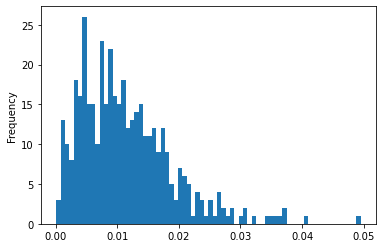

In [57]:
Density['Pop_Density'].plot.hist(bins=70)

This is a chart that shows distribution of density. Like LA County, the graph is skewed but the maximum density is around 0.05

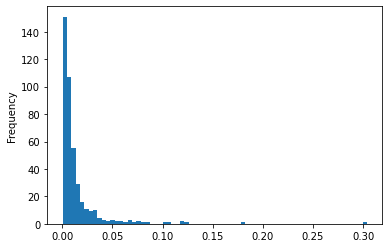

In [58]:
Density['Work_Density'].plot.hist(bins=70)

This chart shows distribution of job density. Not surprisingly, we can learn that the job opportunities tend to be clustered within a few CDBs.

Now let's plot and see the spaticial distribution of the density.

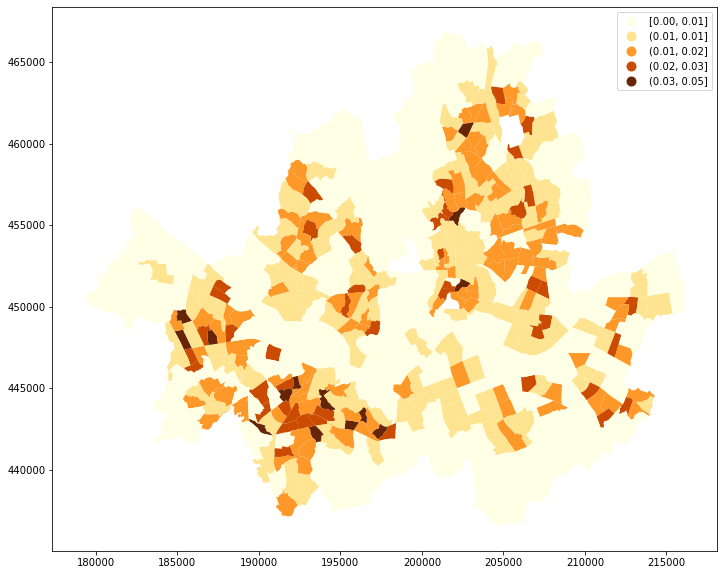

In [59]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Pop_Density',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

In total, southwest part of Seoul seems dense

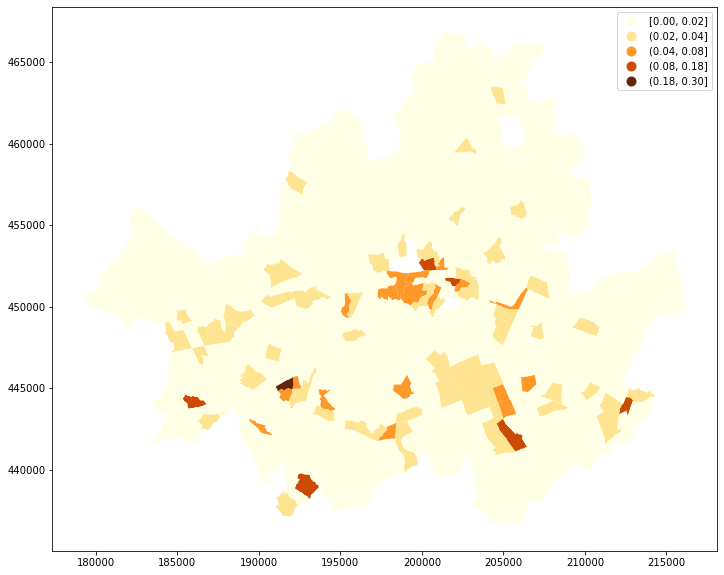

In [60]:
adm_dong_seoul.plot(figsize=(12,10),
                      column='Work_Density',
                      legend=True,
                      scheme='NaturalBreaks',
                      cmap='YlOrBr')

Mid city area and Gangnam area's job density is high. They are CBDs of Seoul.

In [61]:
Seoul_data_web_mercator = adm_dong_seoul.to_crs(epsg=3857)

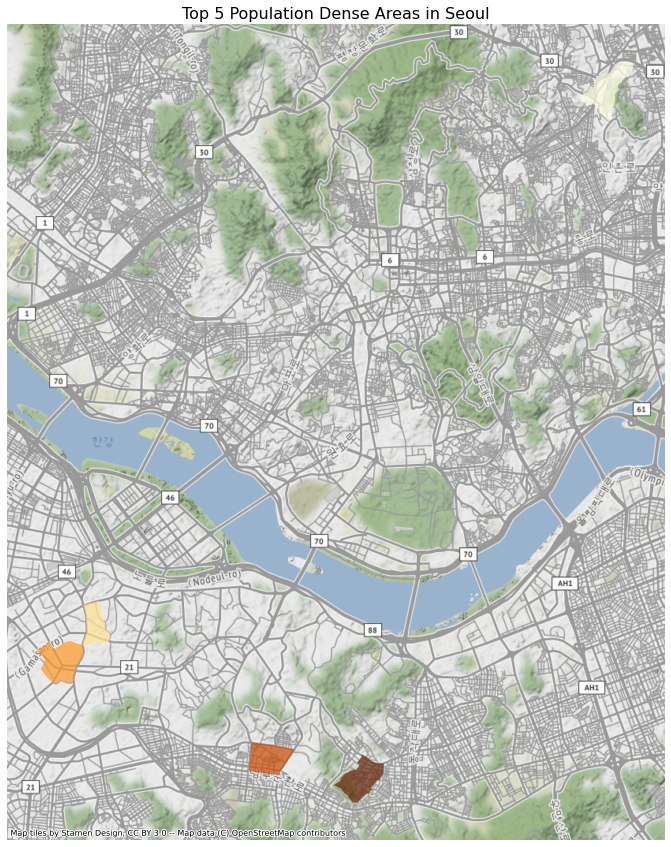

In [62]:
fig, ax = plt.subplots(figsize=(15, 15))
# 0.036165 is the pop_density value of the Top 5th region.
Seoul_data_web_mercator[Seoul_data_web_mercator['Pop_Density'] >= 0.036165].plot(ax=ax, 
                                                                        alpha=0.7, 
                                                                        column='Pop_Density',
                                                                        cmap='YlOrBr', 
                                                                        scheme='NaturalBreaks')

ax.axis('off')
ax.set_title("Top 5 Population Dense Areas in Seoul", fontsize=16)

ctx.add_basemap(ax)

Looks like Sandang4-dong has the highest density and next is Jungang-dong. Thus, We will try to conduct OSMnx analysis on Sadang4-dong in 206-shinahaudrey-midterm-part2. (SPOILER: Sadang4-dong's OpenStreetMap doesn't have the column 'highway' so Audrey will switch the analysis site to 'Jungang-dong'.

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:1712: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:1713: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % uvk, UserWarning)


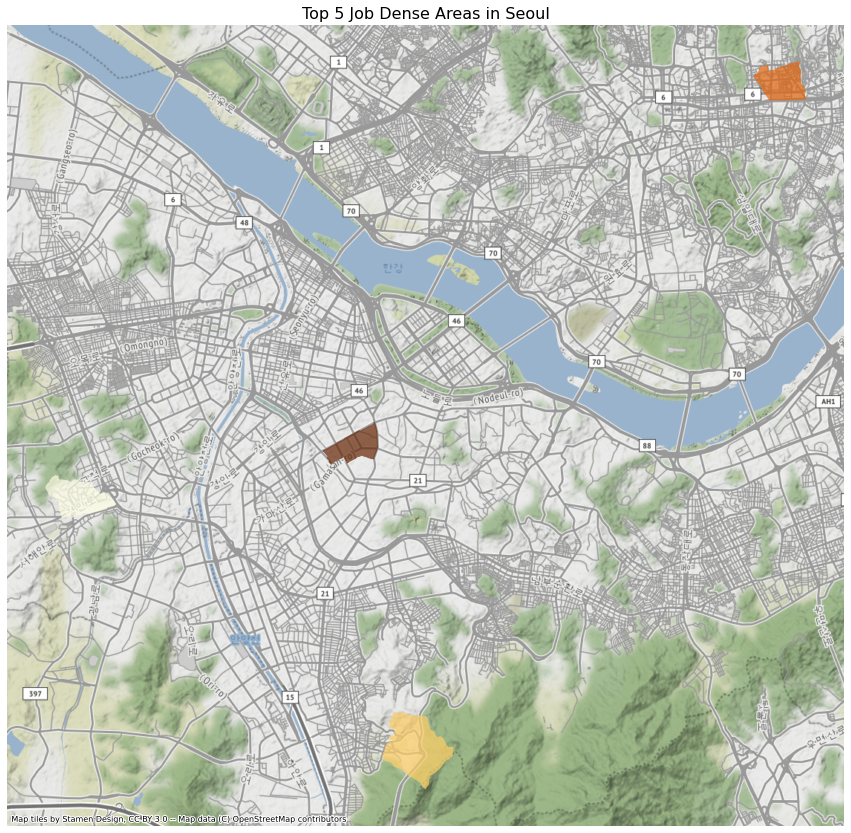

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))
# 0.119874 is the pop_density value of the Top 5th region.
Seoul_data_web_mercator[Seoul_data_web_mercator['Work_Density'] >= 0.119874].plot(ax=ax, 
                                                                        alpha=0.7, 
                                                                        column='Work_Density',
                                                                        cmap='YlOrBr', 
                                                                        scheme='NaturalBreaks')

ax.axis('off')
ax.set_title('Top 5 Job Dense Areas in Seoul',fontsize=16)

ctx.add_basemap(ax)

Looks like Singil3-dong(신길3동) and Jongro5,6ga-dong(종로5,6가동) has the highest job densities in LA.

I want to see the side-by-side map of the population densities, since we have caculated population density for both LA and Seoul. 

Text(0.5, 1.0, 'Population Dense Areas in Seoul')

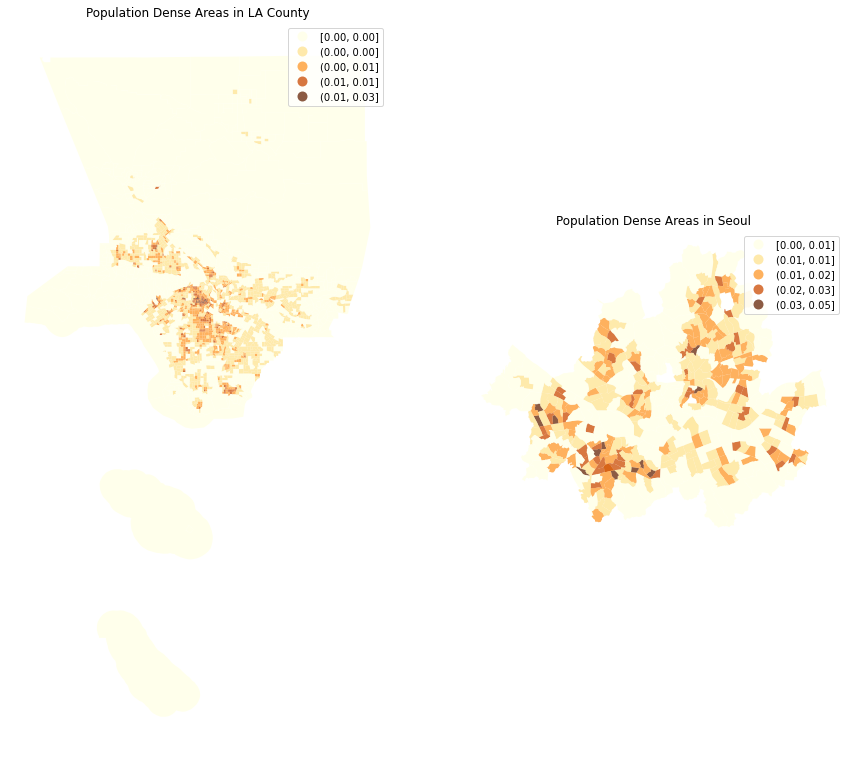

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
LA_pop.plot(column='pop_density', 
            cmap='YlOrBr', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, # transparency
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")  #elimintes numbers in axis
ax1.set_title("Population Dense Areas in LA County")

# spatial lag map on the right
adm_dong_seoul.plot(column='Pop_Density', 
            cmap='YlOrBr', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Population Dense Areas in Seoul")

This is quite hard to interpret since Seoul's area is almost 1/10 of the LA County. But we can see that Seoul's density is much higher than the LA County's and LA County's activities are centered in LA City region, not surprisingly.

**-THIS IS THE END OF '206-shinahaudrey-midterm-part1'- **   

**This notebook is created by Shinah**